To start the EDA, I will import all the libraries I will use, such as Pandas, for functions and methods to manipulate the data in this library and Numpy to solve mathematical problems.

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

I used the 'pd.read_csv' method to access the file that I want to work with.
The warning indicates that Pandas has encountered columns in the DataFrame where the data types are inconsistent throughout, meaning that both strings and numbers are within the same column. I will handle it during the cleaning process.

In [2]:
df = pd.read_csv('2021VAERSDATA_.csv', encoding='ISO-8859-1')
orig_df = df.copy()

C:\Users\danie\AppData\Local\Temp\ipykernel_46892\1116616066.py:1: DtypeWarning: Columns (2,3,5,7,12,23,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021VAERSDATA_.csv', encoding='ISO-8859-1')


In [3]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916767,1/1/221,AK,54,54.0,NaN,F,NaN,Hypotension ticed 24 hours post injectionU Ef...,NaN,...,NaN,HTN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,"ADVAIR, ASMAX, FORADIL, TRAMADOL"
1,918694,1/1/221,AK,23,25.0,NaN,F,NaN,"12/24/22 chills body aches headache, fever of...",NaN,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,Y,Altace
2,917613,1/2/221,AK,31,31.0,NaN,F,NaN,"Fatigue, chills, pain at injection site radiat...",NaN,...,NaN,"Asthma, adhd",Tetanus,NaN,2,1/2/221,NaN,NaN,NaN,Aspergillus
3,918693,1/2/221,AK,6,6.0,NaN,F,NaN,"Starting at 1 am I ticed chills, body aches, v...",NaN,...,NaN,NaN,NaN,NaN,2,1/2/221,NaN,NaN,Y,Aspirin
4,91887,1/4/221,AK,49,49.0,NaN,M,NaN,Patient got his Covid vaccine this past Thursd...,NaN,...,NaN,"Obesity, pre-diabetes",NaN,NaN,2,1/4/221,NaN,NaN,Y,Cephalosporin


I used the method df.shape to have an idea of the dataset size. And I found that this dataset has 34121 rows and 35 columns.

In [4]:
df.shape

(34121, 35)

With the describe() method, I can see that in this dataset, there is only a skewed distribution in two columns ('HOSPDAYS' and 'NUMDAYS') by comparing the values of mean and median (50% value). The other columns are normally distributed. Thus, I will start the cleaning process, but first, I will select the principal features that can be useful to anwser the project questions. 

In [5]:
df.describe()

,VAERS_ID,CAGE_YR,HOSPDAYS,NUMDAYS,FORM_VERS
count,3.412100e+04,26716.000000,2857.000000,17738.000000,34121.000000
mean,4.236210e+05,46.290800,3.554428,29.728267,1.998124
std,4.146203e+05,22.466735,3.671364,768.794004,0.043269
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,9.265500e+04,32.000000,1.000000,1.000000,2.000000
50%,1.517760e+05,46.000000,2.000000,2.000000,2.000000
75%,9.253510e+05,62.000000,4.000000,7.000000,2.000000
max,1.115348e+06,99.000000,39.000000,36896.000000,2.000000


## Cleaning data

To start the cleaning process, I will use the method df.info() because it provides a quick overview of the structure and some basic information about the DataFrame, like data type and if there are missing values. In this case, the dataset presents all the values (no missing values). 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30932 non-null  object 
 4   CAGE_YR       26716 non-null  float64
 5   CAGE_MO       18 non-null     object 
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34107 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

The method below returns True where there is a NaN (Not a Number) value and False otherwise to indicate the presence of missing values. 

The data use guide (Vaccine Adverse Event Reporting System - VAERS) contains essential information about this dataset, like how it was created and filled, for example, in the 'DIED' column, where they used the letter "Y" to indicate that the patient dies and otherwise the field will be blank. Thus, that is the reason why there is NaN in this dataset. In this case, I will transform the NaN in zeros to represent the absence of occurrence.

Example of data use guide: DIED - If the vaccine recipient died a "Y" is used; otherwise the field will be blank.

In [7]:
df.isnull().sum()

VAERS_ID            0
RECVDATE            0
STATE            5571
AGE_YRS          3189
CAGE_YR          7405
CAGE_MO         34103
SEX                 0
RPT_DATE        34058
SYMPTOM_TEXT       14
DIED            32164
DATEDIED        32323
L_THREAT        32862
ER_VISIT        34110
HOSPITAL        29734
HOSPDAYS        31264
X_STAY          34069
DISABLE         33251
RECOVD           2857
VAX_DATE         1499
ONSET_DATE       1863
NUMDAYS         16383
LAB_DATA        24149
V_ADMINBY           0
V_FUNDBY        34057
OTHER_MEDS      16680
CUR_ILL         28198
HISTORY         16838
PRIOR_VAX       32687
SPLTTYPE        25901
FORM_VERS           0
TODAYS_DATE       199
BIRTH_DEFECT    34070
OFC_VISIT       28717
ER_ED_VISIT     28592
ALLERGIES       21045
dtype: int64

As this dataset is vast, I will use the .value_counts() function in the 'STATE' column to know how many records are in each category and focus on one State that satisfies the minimum requirement of the project. Then, I will create a subset with this category. 

This code showed me that I can use the CA State alone or enjoy more than one. I prefer to work with the CA because it is a cosmopolitan place with people from different ethnicities, which may reduce the probability of bias.

In [8]:
category_counts = df['STATE'].value_counts()
print(category_counts)

CA    2577
TX    1807
NY    1783
FL    1654
IN    1142
IL    1135
OH    1072
PA    1012
MI     921
MA     842
NJ     836
NC     752
VA     727
MD     693
AZ     659
WI     649
WA     630
GA     628
CO     617
MN     604
MO     556
TN     526
CT     524
KY     443
OR     363
IA     336
OK     333
LA     317
AL     295
KS     295
SC     286
AR     266
NE     263
MT     262
ME     235
NM     229
UT     229
WV     220
NH     203
NV     197
PR     195
AK     167
ID     157
MS     150
HI     134
SD     116
RI     112
VT     105
ND     101
DE      66
DC      55
WY      53
GU       7
VI       4
MP       3
AS       3
MH       1
FM       1
Ca       1
XB       1
Name: STATE, dtype: int64


Below, I will create the subset with the CA category and work with it from now on. This subset will be named as 'df1'.

In [9]:
by_category = df.groupby('STATE')
df1 = by_category.get_group('CA')
df1.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
1390,91661,1/1/221,CA,73,73.0,NaN,F,NaN,Approximately 3 min post vaccition administrat...,NaN,...,U,U,NaN,NaN,2,1/1/221,NaN,Y,NaN,NaN
1391,916613,1/1/221,CA,4,4.0,NaN,F,NaN,On 12/3/22 I got a pain in the stomach as if s...,NaN,...,NaN,NaN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1392,916617,1/1/221,CA,35,35.0,NaN,F,NaN,"Dizziness, chills, fever, muscle aches, pain a...",NaN,...,NaN,Y,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1393,916621,1/1/221,CA,25,25.0,NaN,F,NaN,Fatigue - 2 hours priorU Muscle aches/pain - 3...,NaN,...,NaN,U,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1394,91669,1/1/221,CA,37,37.0,NaN,M,NaN,Typical sore arm similar to flu shotU Followin...,NaN,...,NaN,NaN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y


In [10]:
df1.shape

(2577, 35)

 I will use the duplicated() method to eliminate records that may be repeated because it can generate misunderstanding conclusions. However in this dataset there is no duplicates as we can see below.

In [11]:
df1.duplicated().sum()

0

I will drop some columns that may not be necessary to answer my question and it could waste time and memory. After dropping, I will nominate the dataset as 'df2'.

In [12]:
df1.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [13]:
df2 = df1.drop(columns=['VAERS_ID', 'RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'SYMPTOM_TEXT', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT'])
df2.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,NaN,NaN,NaN,U,U,NaN
1391,4,F,NaN,NaN,NaN,NaN,NaN,Y
1392,35,F,NaN,NaN,NaN,NaN,Y,Y
1393,25,F,NaN,NaN,NaN,NaN,U,Y
1394,37,M,NaN,NaN,1.0,NaN,NaN,Y


In [14]:
df2.shape

(2577, 8)

In [15]:
df2.dtypes

AGE_YRS       object
SEX           object
DIED          object
DISABLE       object
NUMDAYS      float64
CUR_ILL       object
HISTORY       object
ALLERGIES     object
dtype: object

In [16]:
df2.describe()

,NUMDAYS
count,1318.000000
mean,8.770865
std,83.141858
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,2399.000000


I am using the function .isnull().sum() to calculate the numbers of missing (null and NaN) values in all columns of the dataset. 

In [17]:
df2.isnull().sum()

AGE_YRS       187
SEX             0
DIED         2422
DISABLE      2471
NUMDAYS      1259
CUR_ILL      2096
HISTORY      1148
ALLERGIES    1768
dtype: int64

Below, I am using the method .fillna() to replace the NaN with zero values.

In [18]:
df2.fillna(0, inplace=True)

In [19]:
df2.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,0,0,0.0,U,U,0
1391,4,F,0,0,0.0,0,0,Y
1392,35,F,0,0,0.0,0,Y,Y
1393,25,F,0,0,0.0,0,U,Y
1394,37,M,0,0,1.0,0,0,Y


I replaced all sentences reported in 'CUR_ILL', 'HISTORY', and 'ALLERGIES' with blank space, meaning the absence of the occurrence, 'U' when it was not informed, and 'Y' in the case in which the patient related any occurrence (from mild to several), thus, in this study, I will not make distinguish of the degree of illnesses or allergies. Below, I will present a dictionary with the replacement numbers to make possible the recognition by the models.

# Random Forest model

## Pre-processing

In [20]:
df_rf = df2.copy()
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,0,0,0.0,U,U,0
1391,4,F,0,0,0.0,0,0,Y
1392,35,F,0,0,0.0,0,Y,Y
1393,25,F,0,0,0.0,0,U,Y
1394,37,M,0,0,1.0,0,0,Y


In [21]:
df_rf["DIED"].replace('0', 0, inplace=True)
df_rf["DIED"].replace('Y', 1, inplace=True)

In [22]:
df_rf["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

In [23]:
df_rf["SEX"].replace('F', 0, inplace=True)
df_rf["SEX"].replace('M', 1, inplace=True)
df_rf["SEX"].replace('U', 2, inplace=True)

In [24]:
df_rf["SEX"].value_counts()

0    1837
1     677
2      63
Name: SEX, dtype: int64

In [25]:
df_rf["DISABLE"].replace('0', 0, inplace=True)
df_rf["DISABLE"].replace('Y', 1, inplace=True)

In [26]:
df_rf["DISABLE"].value_counts()

0    2471
1     106
Name: DISABLE, dtype: int64

In [27]:
df_rf["CUR_ILL"].replace('0', 0, inplace=True)
df_rf["CUR_ILL"].replace('Y', 1, inplace=True)
df_rf["CUR_ILL"].replace('U', 2, inplace=True)

In [28]:
df_rf["CUR_ILL"].value_counts()

0    2096
1     349
2     132
Name: CUR_ILL, dtype: int64

In [29]:
df_rf["HISTORY"].replace('0', 0, inplace=True)
df_rf["HISTORY"].replace('Y', 1, inplace=True)
df_rf["HISTORY"].replace('U', 2, inplace=True)

In [30]:
df_rf["HISTORY"].value_counts()

1    1321
0    1148
2     108
Name: HISTORY, dtype: int64

In [31]:
df_rf["ALLERGIES"].replace('0', 0, inplace=True)
df_rf["ALLERGIES"].replace('Y', 1, inplace=True)
df_rf["ALLERGIES"].replace('U', 2, inplace=True)

In [32]:
df_rf["ALLERGIES"].value_counts()

0    1768
1     717
2      92
Name: ALLERGIES, dtype: int64

In [33]:
df_rf['AGE_YRS'] = df_rf['AGE_YRS'].astype(float)

In [34]:
df_rf.dtypes

AGE_YRS      float64
SEX            int64
DIED           int64
DISABLE        int64
NUMDAYS      float64
CUR_ILL        int64
HISTORY        int64
ALLERGIES      int64
dtype: object

In [35]:
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73.0,0,0,0,0.0,2,2,0
1391,4.0,0,0,0,0.0,0,0,1
1392,35.0,0,0,0,0.0,0,1,1
1393,25.0,0,0,0,0.0,0,2,1
1394,37.0,1,0,0,1.0,0,0,1


#### Data Dictionary - dataset (df_rf):

1. AGE_YRS: The recorded vaccine recipient's age in years.

2. SEX: Sex of the vaccine recipient (M = Male, F = Female, Unknown = Blank). (1 = Male, 0 = Female, 2 = Unknown).

3. DIED: If the vaccine recipient died a "Y" is used; otherwise the field will be blank. (0 = Alive, 1 = Died)

4. DISABLE: If the vaccine recipient was disabled as a result of the vaccination a "Y" is placed in this field; otherwise the field will be blank. (0 = not disabled, 1 = disabled)

5. NUMDAYS: The calculated interval (in days) from the vaccination date to the onset date.

6. CUR_ILL: presence of any illnesses at the vaccination time is represented by the letter 'Y', otherwise, blank space for not occurrence, and 'U' for unknown. (0 = Not occurrence, 1 = Occurrence, 2 = Unknown)

7. HISTORY: presence of any pre-existing physician-diagnosed congenital disabilities or medical condition at the vaccination time is represented by the letter 'Y', otherwise, blank space for not occurrence, and 'U' for unknown. (0 = Not occurrence, 1 = Occurrence, 2 = Unknown)

8. ALLERGIES: presence of any pre-existing physician-diagnosed allergies at the vaccination time is represented by the letter 'Y', otherwise, blank space for not occurrence, and 'U' for unknown. (0 = Not occurrence, 1 = Occurrence, 2 = Unknown)

## Model implementation - Random Forest

I will split dataset into training set and test set.

In [36]:
from sklearn.ensemble import RandomForestClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics                         

In [37]:
X = df_rf.drop('DIED', axis=1) 
y = df_rf['DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 51)
X.shape, X.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 7), (2577, 7), (2061, 7), (516, 7), (2061,), (516,))

### Hyperparameters
As mentioned above, this model performs well without heavy tunning of the parameters. The principal parameters are n_estimatores, max_features, and max_depth (Müller and Guido, 2017, p.88). The first is the number of trees; the more significant this number is, the smaller the overfitting. I chose to experiment with the 100 (default) and 1000.
The second parameter determines how random each tree is; by default, I use the 'sqrt(n_features)', which is suitable for classification. The max_depth parameter is the maximum depth of the tree, and in this case, I am using 'None' (default), which means that the nodes expand until all leaves are pure or until all leaves contain less than min_samples_split samples (Scikit-learn.org, 2012). 

I will use the code below to call the Random Forest Classifier,  then I will train the model using the training sets, and I will make predictions onthe test set.

In [38]:
clf_RF = RandomForestClassifier(n_estimators = 1000, random_state = 51, class_weight='balanced', max_depth=5)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Cross-Validation
Cross-validation is a statistical method used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), using the most known tool called k-fold cross-validation to specify the number of folds that will be trained and evaluating the model on different combinations of these folds (Müller and Guido, 2017, p.253).

**Interpretation: Using the mean cross-validation we can conclude that we expect the model to be around 84% accurate on average.** 

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_RF, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores:  [0.95930233 0.93217054 0.88737864 0.74757282 0.70097087]
Mean accuracy:  0.8454790396628283
Standard deviation: 0.10265960491510269


I am using the fuction metrics to calculate the metrics of the model's performance.

In [40]:
from sklearn import metrics
print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )
print( "F1 Score: {:.2f}".format(metrics.f1_score(y_test, y_pred)) )

accuracy: 0.88
precision: 0.27
recall: 0.72
F1 Score: 0.40


###  Accuracy - train and test 

That is the accuracy metric for the training and testing set.

In [41]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.871421639980592
Testing Accuracy : 0.875968992248062


### Important Features
The Random Forest provides feature importances calculated by aggregating the feature importances over the trees in the forest, which is more reliable than the presented in a single tree (Müller and Guido, 2017, p.86). 

The chart below shows which features contribute the most to the model's predictions.

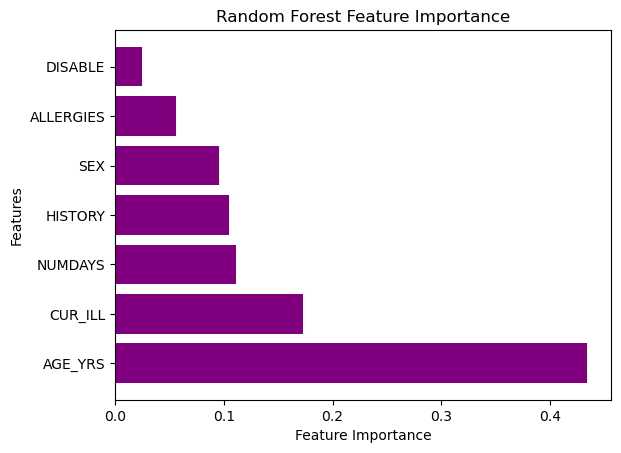

In [42]:
feature_imp = pd.Series(clf_RF.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'purple'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

That is the confusion matrix to the Random forest model and I choose to use it because it is one of the most comprehensive ways to represent the result of evaluating binary classification (Müller and Guido, 2017, p.279).

Text(50.722222222222214, 0.5, 'Actual')

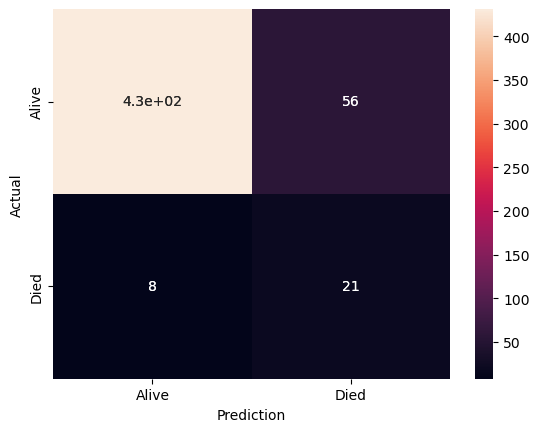

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Model Evaluation: all features

I chose to combine the data obtained in tables and graphs to better visualize the parameters and facilitate the evaluation of the model's performance.

In [44]:
from tabulate import tabulate
data = [
    ["Accuracy", 0.93, 0.94, 0.94],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.40, 0.50, 0.43],
    ["Recall", 0.12, 0.24, 0.28],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.93, 0.94, 0.93],
]   
headers = ["n_estimators = 100", "10%", "20%", "30%"]

data1 = [
    ["Accuracy", 0.93, 0.95, 0.94],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.40, 0.56, 0.44],
    ["Recall", 0.12, 0.31, 0.26],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.95, 0.95, 0.94],
]   
headers1 = ["n_estimators = 1000", "10%", "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

+----------------------+-------+-------+-------+
| n_estimators = 100   |   10% |   20% |   30% |
+======================+=======+=======+=======+
| Accuracy             |  0.93 |  0.94 |  0.94 |
+----------------------+-------+-------+-------+
| CV-Accuracy          |  0.93 |  0.93 |  0.93 |
+----------------------+-------+-------+-------+
| Precision            |  0.4  |  0.5  |  0.43 |
+----------------------+-------+-------+-------+
| Recall               |  0.12 |  0.24 |  0.28 |
+----------------------+-------+-------+-------+
| Training Accuracy    |  0.99 |  0.99 |  0.99 |
+----------------------+-------+-------+-------+
| Testing Accuracy     |  0.93 |  0.94 |  0.93 |
+----------------------+-------+-------+-------+
+-----------------------+-------+-------+-------+
| n_estimators = 1000   |   10% |   20% |   30% |
+=======================+=======+=======+=======+
| Accuracy              |  0.93 |  0.95 |  0.94 |
+-----------------------+-------+-------+-------+
| CV-Accuracy  

### Adjusting hyperparameters

+------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced'   |   20% |
+================================================+=======+
| Accuracy                                       |  0.94 |
+------------------------------------------------+-------+
| CV-Accuracy                                    |  0.92 |
+------------------------------------------------+-------+
| Precision                                      |  0.47 |
+------------------------------------------------+-------+
| Recall                                         |  0.31 |
+------------------------------------------------+-------+
| F1 Score                                       |  0.38 |
+------------------------------------------------+-------+
| Training Accuracy                              |  0.98 |
+------------------------------------------------+-------+
| Testing Accuracy                               |  0.94 |
+------------------------------------------------+------

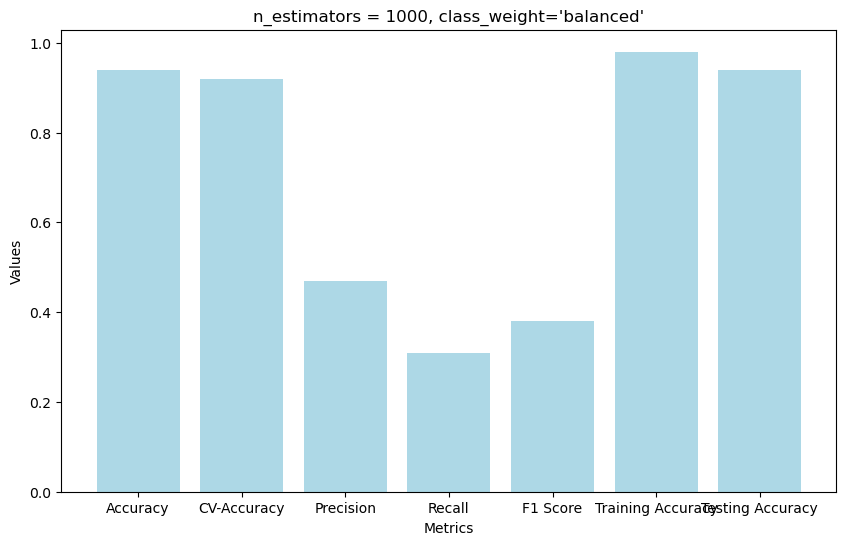

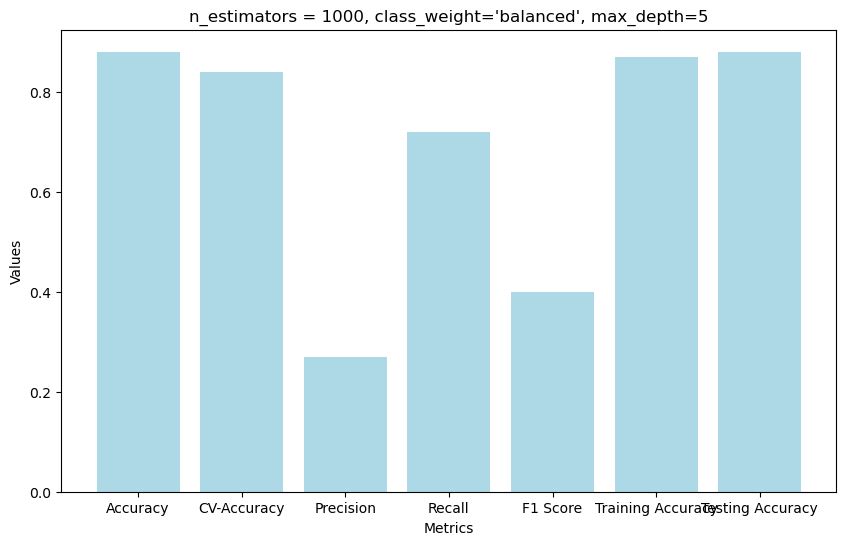

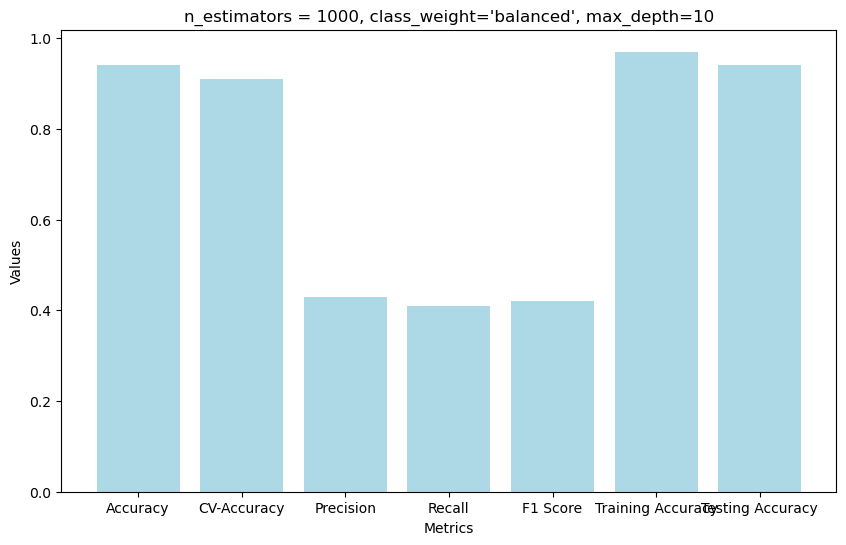

In [45]:
import matplotlib.pyplot as plt

data = [
    ["Accuracy", 0.94],
    ["CV-Accuracy", 0.92],
    ["Precision", 0.47],
    ["Recall", 0.31],
    ["F1 Score", 0.38],
    ["Training Accuracy", 0.98],
    ["Testing Accuracy", 0.94],
]   
headers = ["n_estimators = 1000, class_weight='balanced'", "20%"]

data1 = [
    ["Accuracy", 0.88],
    ["CV-Accuracy", 0.84],
    ["Precision", 0.27],
    ["Recall", 0.72],
    ["F1 Score", 0.40],
    ["Training Accuracy", 0.87],
    ["Testing Accuracy", 0.88],
]   
headers1 = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "20%"]

data2 = [
    ["Accuracy", 0.94],
    ["CV-Accuracy", 0.91],
    ["Precision", 0.43],
    ["Recall", 0.41],
    ["F1 Score", 0.42],
    ["Training Accuracy", 0.97],
    ["Testing Accuracy", 0.94],
]   
headers2 = ["n_estimators = 1000, class_weight='balanced', max_depth=10", "20%"]


print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightblue')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()

plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced'")
plot_bar_chart(data1, headers1, "n_estimators = 1000, class_weight='balanced', max_depth=5")
plot_bar_chart(data2, headers2, "n_estimators = 1000, class_weight='balanced', max_depth=10")

## Model Evaluation: all features four features: DISABLE, CUR_ILL, HISTORY, ALLERGIES
#### (n_estimators = 1000, random_state = 51, class_weight='balanced', max_depth=5)

+-------------------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced', max_depth=5   |   20% |
+=============================================================+=======+
| Accuracy                                                    |  0.86 |
+-------------------------------------------------------------+-------+
| CV-Accuracy                                                 |  0.72 |
+-------------------------------------------------------------+-------+
| Precision                                                   |  0.17 |
+-------------------------------------------------------------+-------+
| Recall                                                      |  0.38 |
+-------------------------------------------------------------+-------+
| F1 Score                                                    |  0.23 |
+-------------------------------------------------------------+-------+
| Training Accuracy                                           | 

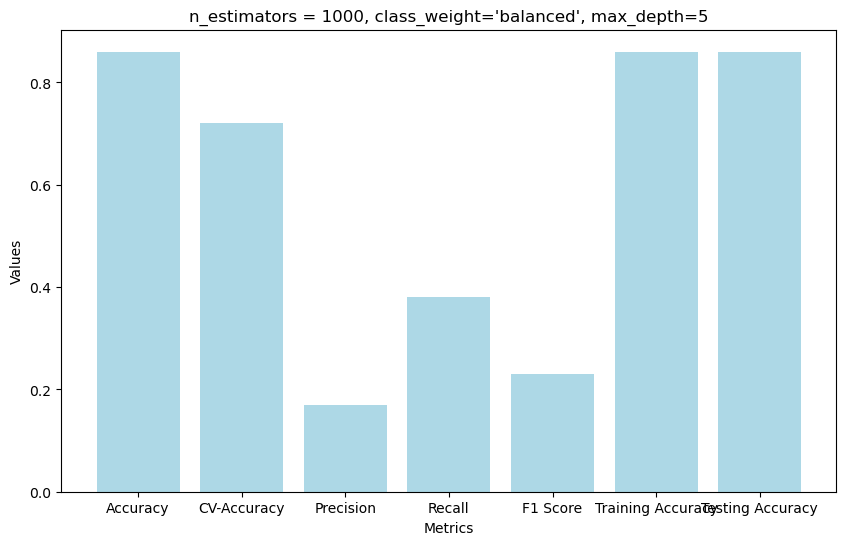

In [46]:
data = [
    ["Accuracy", 0.86],
    ["CV-Accuracy", 0.72],
    ["Precision", 0.17],
    ["Recall", 0.38],
    ["F1 Score", 0.23],
    ["Training Accuracy", 0.86],
    ["Testing Accuracy", 0.86],
]   
headers = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "20%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightblue')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()
plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced', max_depth=5")

## Randon Forest - SMOTE 

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2061, 7), (516, 7), (2061,), (516,))

I am Applying SMOTE to the training set only. If I apply to the entire dataset will result in a overfit of the negative class (target), that will generate excellent metrics but in accordance with the real dataset.

In [49]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((3888, 7), (3888,))

I will use the code below to call the Random Forest Classifier with the data balanced (SMOTE),  then I will train the model using the training sets, and I will make predictions onthe test set.

In [50]:
rf_smote = RandomForestClassifier(n_estimators = 1000, random_state = 67, max_depth = 5)

rf_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=67)

Making predictions on the test set.

In [51]:
y_pred_smote = rf_smote.predict(X_test)

### Hyperparameters

In [52]:
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_smote)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred_smote)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred_smote)) )
print( "F1 Score: {:.2f}".format(metrics.f1_score(y_test, y_pred_smote)) )

Accuracy: 0.80
precision: 0.23
recall: 0.68
F1 Score: 0.34


### Cross-validation

In [53]:
scores = cross_val_score(rf_smote, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores:  [0.93992248 0.93992248 0.93980583 0.92815534 0.93980583]
Mean accuracy:  0.9375223903063145
Standard deviation: 0.0046838158017898125


###  Accuracy - train and test 

That is the accuracy metric for the training and testing set.

In [54]:
print("Training Accuracy :", rf_smote.score(X_train, y_train))
print("Testing Accuracy :", rf_smote.score(X_test, y_test))

Training Accuracy : 0.8272683163512858
Testing Accuracy : 0.8042635658914729


### Important Feature

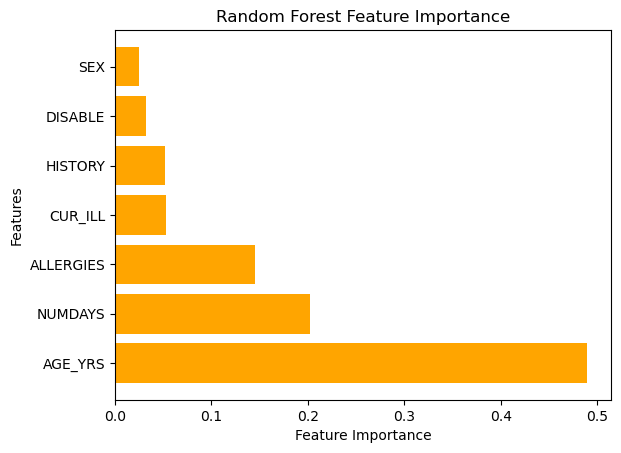

In [55]:
feature_imp = pd.Series(rf_smote.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'orange'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

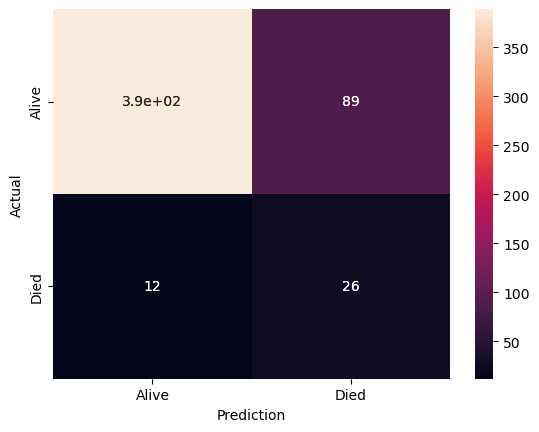

In [56]:
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

+------------------------------------+-------+
| n_estimators = 1000, max_depth=5   |   20% |
+====================================+=======+
| Accuracy                           |  0.8  |
+------------------------------------+-------+
| CV-Accuracy                        |  0.94 |
+------------------------------------+-------+
| Precision                          |  0.23 |
+------------------------------------+-------+
| Recall                             |  0.68 |
+------------------------------------+-------+
| F1 Score                           |  0.34 |
+------------------------------------+-------+
| Training Accuracy                  |  0.83 |
+------------------------------------+-------+
| Testing Accuracy                   |  0.8  |
+------------------------------------+-------+
+-------------------------------------+-------+
| n_estimators = 1000, max_depth=10   |   20% |
+=====================================+=======+
| Accuracy                            |  0.88 |
+--------

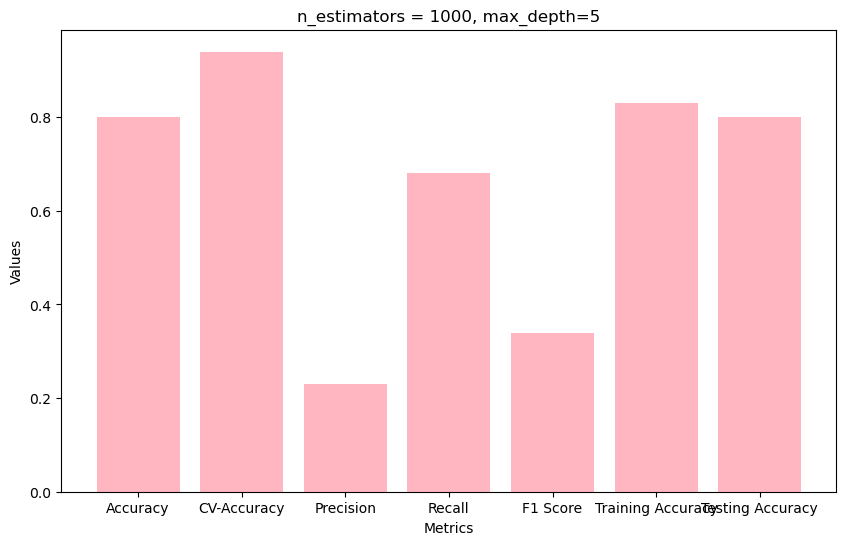

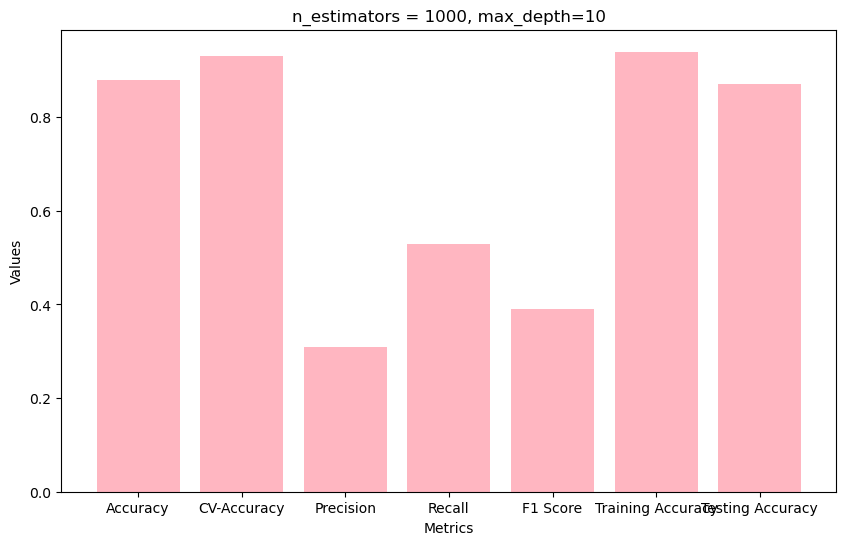

In [57]:
data = [
    ["Accuracy", 0.80],
    ["CV-Accuracy",0.94],
    ["Precision", 0.23],
    ["Recall", 0.68],
    ["F1 Score", 0.34],
    ["Training Accuracy", 0.83],
    ["Testing Accuracy", 0.80],
]   
headers = ["n_estimators = 1000, max_depth=5", "20%"]

data1 = [
    ["Accuracy", 0.88],
    ["CV-Accuracy", 0.93],
    ["Precision", 0.31],
    ["Recall", 0.53],
    ["F1 Score",0.39],
    ["Training Accuracy", 0.94],
    ["Testing Accuracy", 0.87],
]   
headers1 = ["n_estimators = 1000, max_depth=10", "20%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightpink')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()

plot_bar_chart(data, headers, "n_estimators = 1000, max_depth=5")
plot_bar_chart(data1, headers1, "n_estimators = 1000, max_depth=10")

## Principal Component Analysis - PCA

Before starting the PCA process, I checked that the data was correct. To avoid entering wrong data into the scale function and generating incorrect results.
I named the data with another name to avoid accessing the previous data, leading to a misunderstanding. 

In [58]:
data = df_rf
feature_names = ['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']

df_pca = pd.DataFrame(data=df_rf[feature_names], columns=feature_names)

df_pca['DIED'] = pd.Series(df_rf['DIED'])

df_pca.head()

,AGE_YRS,SEX,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES,DIED
1390,73.0,0,0,0.0,2,2,0,0
1391,4.0,0,0,0.0,0,0,1,0
1392,35.0,0,0,0.0,0,1,1,0
1393,25.0,0,0,0.0,0,2,1,0
1394,37.0,1,0,1.0,0,0,1,0


In [59]:
df_pca["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

Spliting the data into training and testing.

In [60]:
X = df_pca.drop('DIED', axis=1)
y = df_pca['DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 7), (2577,), (1803, 7), (774, 7), (1803,), (774,))

### Scaling the data

I used the StandardScaler function to scale my data to avoid erroneous results, as this model also requires values from all columns in the same range. 

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[-0.65955112 -0.60571733 -0.19797243 ... -0.44413612 -1.04946176
   1.22407566]
 [ 1.26637534 -0.60571733 -0.19797243 ... -0.44413612 -1.04946176
  -0.63524061]
 [-0.29075669 -0.60571733 -0.19797243 ... -0.44413612 -1.04946176
   1.22407566]
 ...
 [ 0.89758091  1.34447614 -0.19797243 ...  1.46702718  0.72890248
  -0.63524061]
 [-0.45466533 -0.60571733 -0.19797243 ...  1.46702718  2.50726672
  -0.63524061]
 [ 0.24194637 -0.60571733 -0.19797243 ... -0.44413612 -1.04946176
  -0.63524061]] 	 [[-1.56104861 -0.60571733 -0.19797243 ... -0.44413612 -1.04946176
  -0.63524061]
 [ 1.63516977  1.34447614  5.05120836 ...  1.46702718  0.72890248
  -0.63524061]
 [-0.33173385 -0.60571733 -0.19797243 ... -0.44413612 -1.04946176
   1.22407566]
 ...
 [ 0.77464944  1.34447614 -0.19797243 ...  1.46702718  0.72890248
  -0.63524061]
 [ 1.22539818 -0.60571733 -0.19797243 ... -0.44413612  0.72890248
  -0.63524061]
 [-1.15127703 -0.60571733 -0.19797243 ...  1.46702718 -1.04946176
   1.22407566]] 	 [[ 1.2253981

Here, I am determining that I want to keep the data pattern in the first two principal components using the data scaled.

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (2577, 7)
Reduced shape: (2577, 2)


That is sum of the first two principal components.

In [63]:
PCA_sum = 0.2233018 + 0.16230341
print(PCA_sum)

0.38560521000000003


Below, the variance in the first two principal components is calculated after redimension the data

In [64]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.23072398 0.16442689]


In [65]:
num_components = 2
pca = PCA(n_components=num_components)
projected = pca.fit_transform(X_scaled)
projected.shape

(2577, 2)

In [66]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[ 3.81796455 -1.90203409]
 [-2.04096953  0.07866547]
 [-0.4904742  -0.63483936]
 ...
 [ 1.54328174  0.12162279]
 [ 3.36074834 -0.67971157]
 [ 1.45453158 -0.94741695]] 39.51508712812014


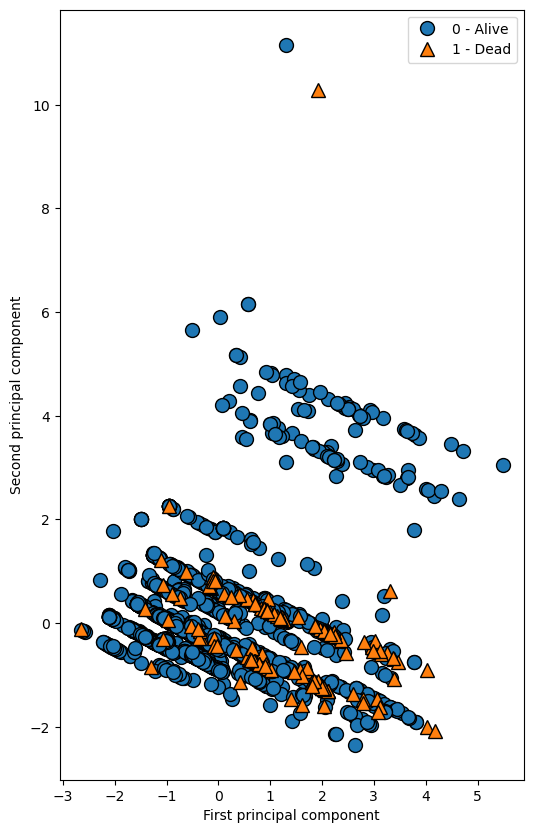

In [67]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(10, 10)) 
scatter = mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df_pca['DIED'])
plt.legend(handles=scatter, labels=['0 - Alive', '1 - Dead'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [68]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.40871415  0.15697198  0.29131777  0.02456729  0.54822975  0.57992003
  -0.29322318]
 [-0.22657461  0.48466152  0.74291148  0.22319444 -0.19251869 -0.23937106
  -0.13293601]]


This heatmap shows how each feature contibuted for each class.

<Axes: >

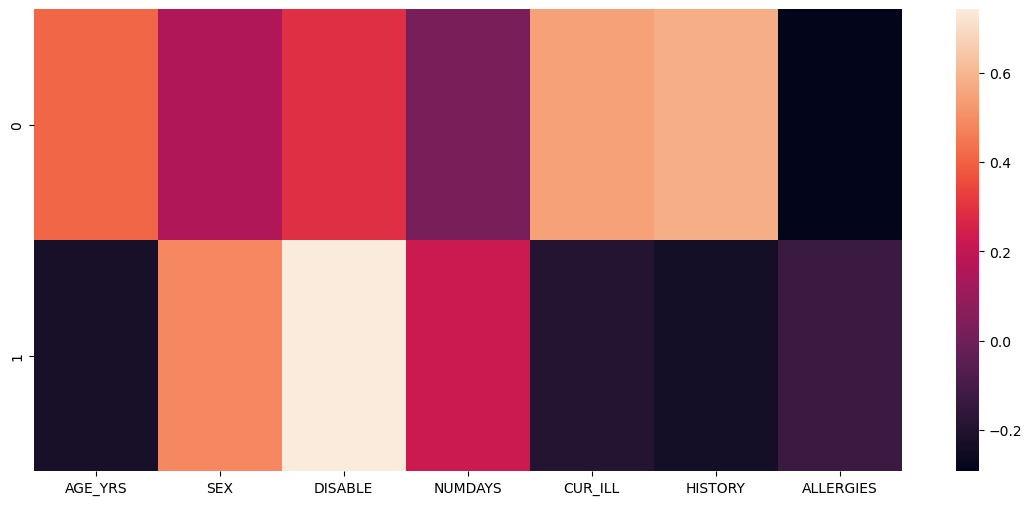

In [69]:
df_comp = pd.DataFrame(pca.components_, columns=['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES'])

feature_names = df_pca[['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']].columns

df_comp.columns = feature_names

plt.figure(figsize =(14, 6))
sns.heatmap(df_comp)

## Random Forest with PCA

Here, I am applying the Random Forest with PCA data. Starting by calling  the X and Y variable, followed by spliting into training and testing set, and then scaling the dataset

In [70]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

X = df_pca.drop('DIED', axis=1)
y = df_pca['DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

Applying PCA

In [71]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Training the Random Forest model and making preditions

In [72]:
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42, class_weight='balanced', max_depth=5)
rf_model.fit(X_train_pca, y_train)

predictions = rf_model.predict(X_test_pca)

### Cross-validation and other metrics

In [73]:
cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy: ", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy:  0.8449612403100775
Cross-Validation Scores: [0.86426593 0.81717452 0.86426593 0.86944444 0.85      ]
Mean CV Accuracy: 0.853030163127116
Precision: 0.2536231884057971
Recall: 0.6730769230769231
F1 Score: 0.368421052631579


### Accuracy: Train and test

In [74]:
print("Training Accuracy :", rf_model.score(X_train_pca, y_train))
print("Testing Accuracy :", rf_model.score(X_test_pca, y_test))

Training Accuracy : 0.8746533555185801
Testing Accuracy : 0.8449612403100775


Text(50.722222222222214, 0.5, 'Actual')

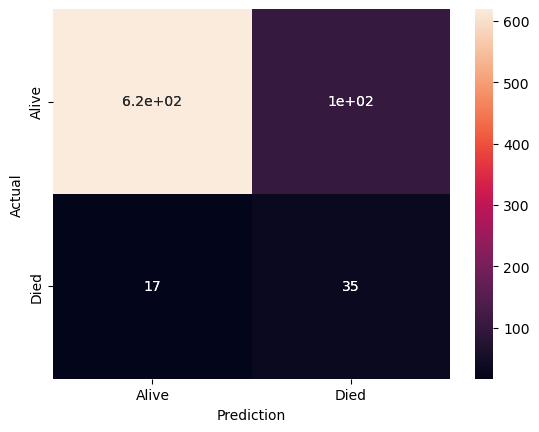

In [75]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Model Evaluation: Random Forest with PCA

In [76]:
from tabulate import tabulate
data = [
    ["Accuracy", 0.92, 0.91, 0.91],
    ["CV-Accuracy", 0.92, 0.93, 0.92],
    ["Precision", 0.22, 0.21, 0.34],
    ["Recall", 0.13, 0.12, 0.19],
    ["F1 Score", 0.16, 0.15, 0.25],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.92, 0.91, 0.92],
]   
headers = ["n_estimators = 100", "10%", "20%", "30%"]


data1 = [
    ["Accuracy", 0.92, 0.91, 0.92],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.20, 0.19, 0.29],
    ["Recall", 0.13, 0.09, 0.15],
    ["F1 Score", 0.16, 0.12, 0.20],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.92, 0.91, 0.92],
]   
headers1 = ["n_estimators = 10000", "10%",  "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

+----------------------+-------+-------+-------+
| n_estimators = 100   |   10% |   20% |   30% |
+======================+=======+=======+=======+
| Accuracy             |  0.92 |  0.91 |  0.91 |
+----------------------+-------+-------+-------+
| CV-Accuracy          |  0.92 |  0.93 |  0.92 |
+----------------------+-------+-------+-------+
| Precision            |  0.22 |  0.21 |  0.34 |
+----------------------+-------+-------+-------+
| Recall               |  0.13 |  0.12 |  0.19 |
+----------------------+-------+-------+-------+
| F1 Score             |  0.16 |  0.15 |  0.25 |
+----------------------+-------+-------+-------+
| Training Accuracy    |  0.99 |  0.99 |  0.99 |
+----------------------+-------+-------+-------+
| Testing Accuracy     |  0.92 |  0.91 |  0.92 |
+----------------------+-------+-------+-------+
+------------------------+-------+-------+-------+
| n_estimators = 10000   |   10% |   20% |   30% |
+========================+=======+=======+=======+
| Accuracy    

### Adjusting hyperparameters

+------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced'   |   30% |
+================================================+=======+
| Accuracy                                       |  0.91 |
+------------------------------------------------+-------+
| CV-Accuracy                                    |  0.92 |
+------------------------------------------------+-------+
| Precision                                      |  0.29 |
+------------------------------------------------+-------+
| Recall                                         |  0.23 |
+------------------------------------------------+-------+
| F1 Score                                       |  0.25 |
+------------------------------------------------+-------+
| Training Accuracy                              |  0.98 |
+------------------------------------------------+-------+
| Testing Accuracy                               |  0.91 |
+------------------------------------------------+------

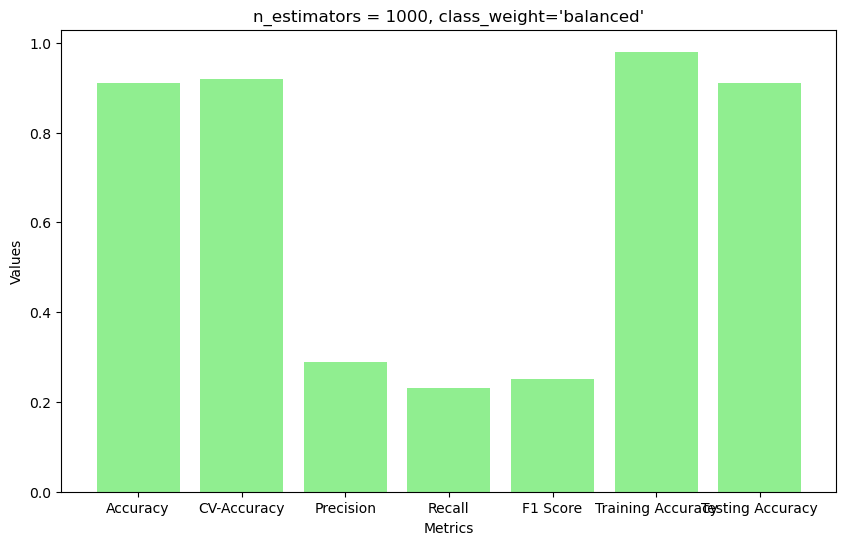

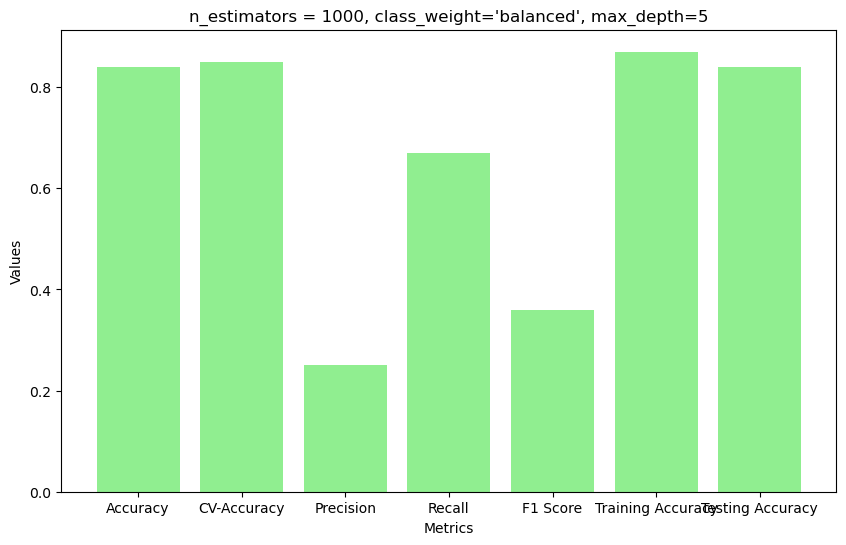

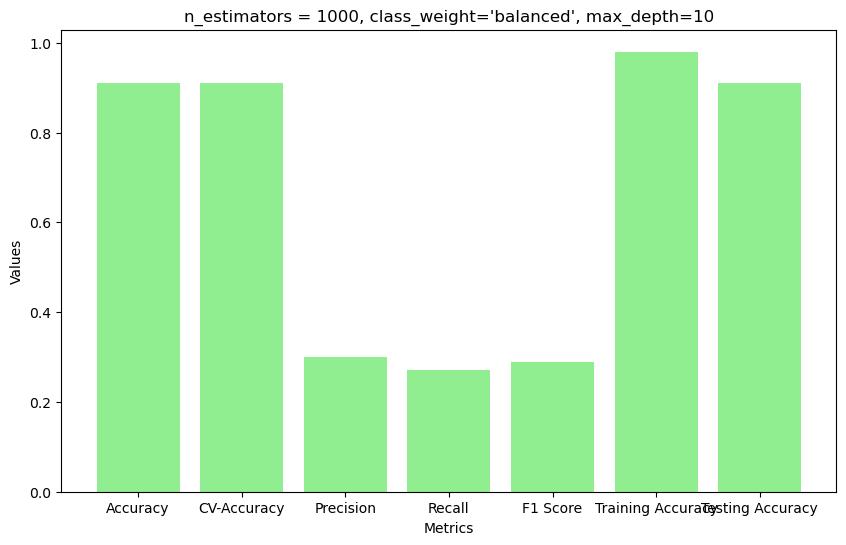

In [77]:
data = [
    ["Accuracy", 0.91],
    ["CV-Accuracy", 0.92],
    ["Precision", 0.29],
    ["Recall", 0.23],
    ["F1 Score", 0.25],
    ["Training Accuracy", 0.98],
    ["Testing Accuracy", 0.91],
]   
headers = ["n_estimators = 1000, class_weight='balanced'", "30%"]

data1 = [
    ["Accuracy", 0.84],
    ["CV-Accuracy", 0.85],
    ["Precision", 0.25],
    ["Recall", 0.67],
    ["F1 Score", 0.36],
    ["Training Accuracy", 0.87],
    ["Testing Accuracy", 0.84],
]   
headers1 = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "30%"]

data2 = [
    ["Accuracy", 0.91],
    ["CV-Accuracy", 0.91],
    ["Precision", 0.30],
    ["Recall", 0.27],
    ["F1 Score", 0.29],
    ["Training Accuracy", 0.98],
    ["Testing Accuracy", 0.91],
]   
headers2 = ["n_estimators = 1000, class_weight='balanced', max_depth=10", "30%"]


print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightgreen')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()

plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced'")
plot_bar_chart(data1, headers1, "n_estimators = 1000, class_weight='balanced', max_depth=5")
plot_bar_chart(data2, headers2, "n_estimators = 1000, class_weight='balanced', max_depth=10")

## Model Evaluation: four features: DISABLE, CUR_ILL, HISTORY, ALLERGIES
#### (n_estimators = 1000, random_state = 42, class_weight='balanced', max_depth=5)

+-------------------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced', max_depth=5   |   30% |
+=============================================================+=======+
| Accuracy                                                    |  0.62 |
+-------------------------------------------------------------+-------+
| CV-Accuracy                                                 |  0.74 |
+-------------------------------------------------------------+-------+
| Precision                                                   |  0.13 |
+-------------------------------------------------------------+-------+
| Recall                                                      |  0.79 |
+-------------------------------------------------------------+-------+
| F1 Score                                                    |  0.22 |
+-------------------------------------------------------------+-------+
| Training Accuracy                                           | 

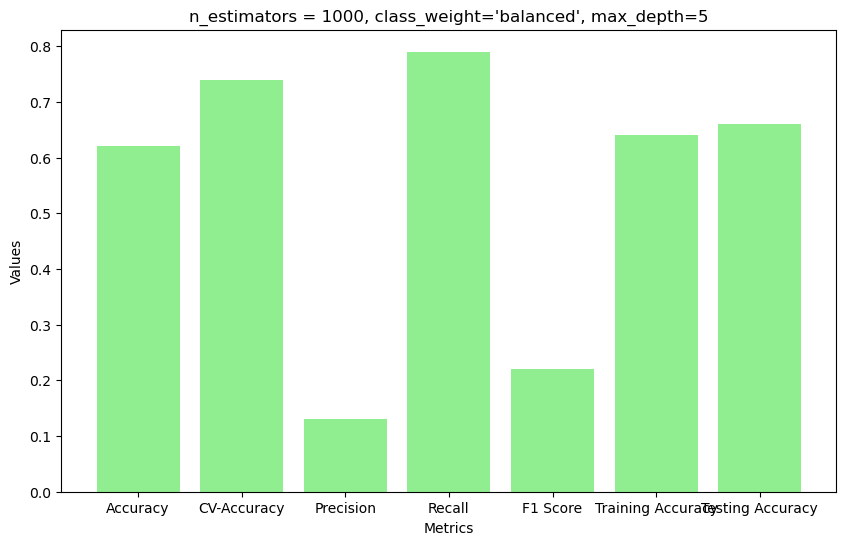

In [78]:
data = [
    ["Accuracy", 0.62],
    ["CV-Accuracy", 0.74],
    ["Precision", 0.13],
    ["Recall", 0.79],
    ["F1 Score", 0.22],
    ["Training Accuracy", 0.64],
    ["Testing Accuracy", 0.66],
]   
headers = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightgreen')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()
plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced', max_depth=5")

# Artificial Neural Networks - ANN
#### With data scaled

In [79]:
df_ann = df_rf.copy()
df_ann

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73.0,0,0,0,0.0,2,2,0
1391,4.0,0,0,0,0.0,0,0,1
1392,35.0,0,0,0,0.0,0,1,1
1393,25.0,0,0,0,0.0,0,2,1
1394,37.0,1,0,0,1.0,0,0,1
...,...,...,...,...,...,...,...,...
3963,62.0,1,1,0,2.0,1,1,0
3964,79.0,1,1,0,3.0,1,1,0
3965,43.0,1,1,0,2.0,1,1,0
3966,89.0,1,1,0,0.0,2,1,0


I will split the data into training and testing sets and then use the Standardize to scaling the data, as it is an important requirement of ANN model because of the amount of complex calculations that are made in the algorithms. 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2319, 7), (258, 7), (2319,), (258,))

### Cross-Validation and other metrics

In [81]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=21)

In [82]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

Spliting the data into training and validation sets with cross-validation

In [83]:
X_train_fold, X_val_fold = X_train_scaled, X_train_scaled
y_train_fold, y_val_fold = y_train, y_train

I am using the function Sequential and Dense to call the model and set up the layes and number of neurons.
I used the 'sigmoid' activation as it recomended for binary classification what is in accordance with the dataset.

In [84]:
from keras.models import Sequential 
from keras.layers import Dense

model_ann_scaled = Sequential()

model_ann_scaled.add(Dense(8, activation = 'relu', input_dim = 7))
model_ann_scaled.add(Dense(16, activation = 'relu'))
model_ann_scaled.add(Dense(1, activation = 'sigmoid'))

In [85]:
model_ann_scaled.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Training the model with cross-validation. I am using epocs with a high number because I want to allow the model to capture patterns as much as possible to improve its performance.  

In [86]:
model_ann_scaled.fit(X_train_fold, y_train_fold, epochs=200, validation_data=(X_val_fold, y_val_fold))

Epoch 1/200
73/73 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.9392 - val_loss: 0.3347 - val_accuracy: 0.9392
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9392 - val_loss: 0.2292 - val_accuracy: 0.9392
Epoch 3/200
73/73 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9392 - val_loss: 0.2095 - val_accuracy: 0.9392
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9392 - val_loss: 0.2030 - val_accuracy: 0.9392
Epoch 5/200
73/73 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9392 - val_loss: 0.1992 - val_accuracy: 0.9392
Epoch 6/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9392 - val_loss: 0.1963 - val_accuracy: 0.9392
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9392 - val_loss: 0.1938 - val_accuracy: 0.9392
Epoch 8/200
7

Epoch 59/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9457 - val_loss: 0.1584 - val_accuracy: 0.9465
Epoch 60/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9470 - val_loss: 0.1582 - val_accuracy: 0.9461
Epoch 61/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9448 - val_loss: 0.1579 - val_accuracy: 0.9461
Epoch 62/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9470 - val_loss: 0.1578 - val_accuracy: 0.9470
Epoch 63/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9461 - val_loss: 0.1576 - val_accuracy: 0.9461
Epoch 64/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9461 - val_loss: 0.1573 - val_accuracy: 0.9465
Epoch 65/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9465 - val_loss: 0.1571 - val_accuracy: 0.9457
Epoch 

73/73 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.9474 - val_loss: 0.1445 - val_accuracy: 0.9474
Epoch 174/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9483 - val_loss: 0.1446 - val_accuracy: 0.9470
Epoch 175/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9478 - val_loss: 0.1445 - val_accuracy: 0.9491
Epoch 176/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9483 - val_loss: 0.1444 - val_accuracy: 0.9478
Epoch 177/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9487 - val_loss: 0.1446 - val_accuracy: 0.9491
Epoch 178/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9483 - val_loss: 0.1440 - val_accuracy: 0.9483
Epoch 179/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9483 - val_loss: 0.1439 - val_accuracy: 0.9478
Epoch 180/200

 Evaluate the model with the cross-validation

In [87]:
y_val_pred = (model_ann_scaled.predict(X_val_fold) > 0.5).astype(int)  # Convert probabilities to binary predictions

73/73 [==============================] - 0s 876us/step


### Metrics based on cross-validation 

#### Evaluate the model on the training set

In [88]:
accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
precision_scores.append(precision_score(y_val_fold, y_val_pred))
recall_scores.append(recall_score(y_val_fold, y_val_pred))
f1_scores.append(f1_score(y_val_fold, y_val_pred))

In [89]:
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print(f"Accuracy-training set: {mean_accuracy}")
print(f"Precision-training set: {mean_precision}")
print(f"Recall-training set: {mean_recall}")
print(f"F1 Score-training set: {mean_f1}")

Accuracy-training set: 0.9486847779215178
Precision-training set: 0.6896551724137931
Recall-training set: 0.28368794326241137
F1 Score-training set: 0.40201005025125636


#### Evaluate the model on the test set

In [90]:
y_test_pred = (model_ann_scaled.predict(X_test_scaled) > 0.5).astype(int) # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy-Test Set: {test_accuracy}")
print(f"Precision-Test Set: {test_precision}")
print(f"Recall-Test Set: {test_recall}")
print(f"F1 Score-Test Set: {test_f1}")

9/9 [==============================] - 0s 2ms/step
Accuracy-Test Set: 0.9651162790697675
Precision-Test Set: 0.7777777777777778
Recall-Test Set: 0.5
F1 Score-Test Set: 0.6086956521739131


9/9 [==============================] - 0s 0s/step


Text(50.722222222222214, 0.5, 'Actual')

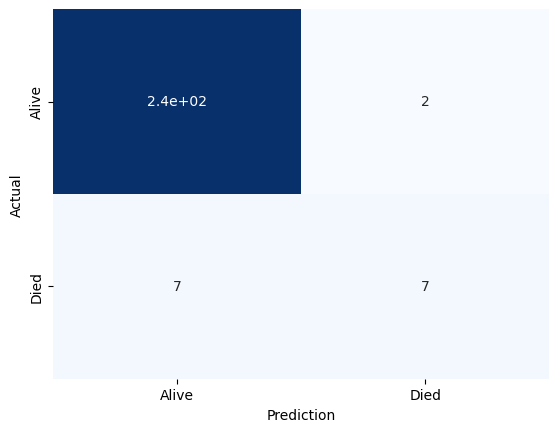

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model_ann_scaled.predict(X_test_scaled)
y_test_pred = y_test_pred.flatten()
y_test_pred_sc = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_sc)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

#### ROC Curve

In [92]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model_ann_scaled.predict(X_test_scaled)

9/9 [==============================] - 0s 876us/step


In [93]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

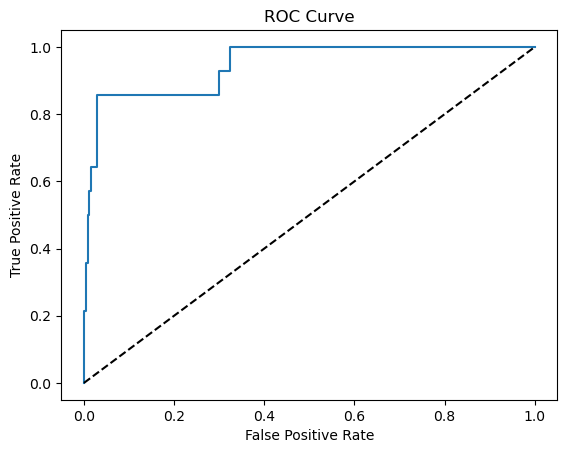

In [94]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Adjusting hyperparameters

+------------+---------+--------+
| 10% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |    0.95 |   0.96 |
+------------+---------+--------+
| Precision  |    0.7  |   0.7  |
+------------+---------+--------+
| Recall     |    0.44 |   0.5  |
+------------+---------+--------+
| F1 Score   |    0.54 |   0.58 |
+------------+---------+--------+
+------------+---------+--------+
| 30% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |    0.95 |   0.94 |
+------------+---------+--------+
| Precision  |    0.77 |   0.66 |
+------------+---------+--------+
| Recall     |    0.41 |   0.28 |
+------------+---------+--------+
| F1 Score   |    0.53 |   0.54 |
+------------+---------+--------+


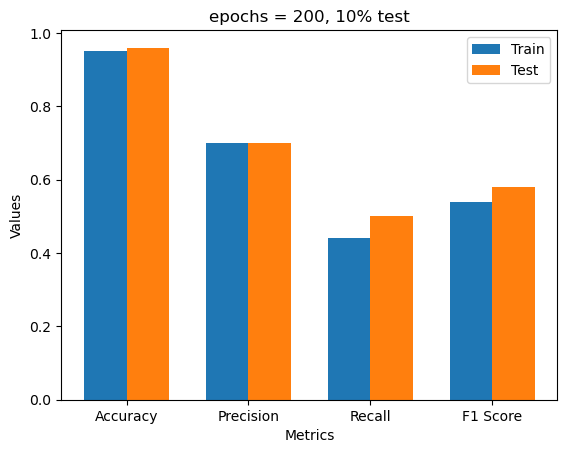

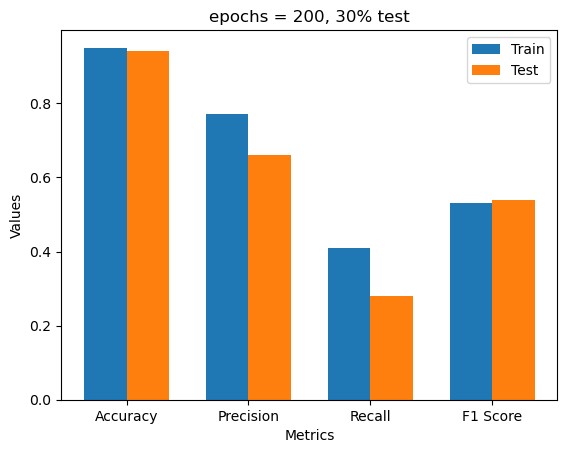

In [95]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    ["Accuracy", 0.95, 0.96],
    ["Precision", 0.70, 0.70],
    ["Recall", 0.44, 0.50],
    ["F1 Score", 0.54, 0.58],
]   
headers = ["10% test", "Train", "Test"]

data1 = [
    ["Accuracy", 0.95, 0.94],
    ["Precision", 0.77, 0.66],
    ["Recall", 0.41, 0.28],
    ["F1 Score", 0.53, 0.54],
]   
headers1 = ["30% test", "Train", "Test"]
print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "epochs = 200, 10% test")
plot_data(data1, headers1, "epochs = 200, 30% test")


## Comparison between all models

+--------------+--------+------------+----------+
| Parameters   |   RF-I |   RF-SMOTE |   RF-PCA |
+==============+========+============+==========+
| Training Ac  |   0.87 |       0.83 |     0.87 |
+--------------+--------+------------+----------+
| Testing Ac   |   0.88 |       0.8  |     0.84 |
+--------------+--------+------------+----------+
| CV-Ac        |   0.84 |       0.94 |     0.85 |
+--------------+--------+------------+----------+
| Precision    |   0.27 |       0.23 |     0.25 |
+--------------+--------+------------+----------+
| Recall       |   0.72 |       0.68 |     0.67 |
+--------------+--------+------------+----------+
| F1 Score     |   0.4  |       0.34 |     0.36 |
+--------------+--------+------------+----------+
CV = Cross-Validation accuracy


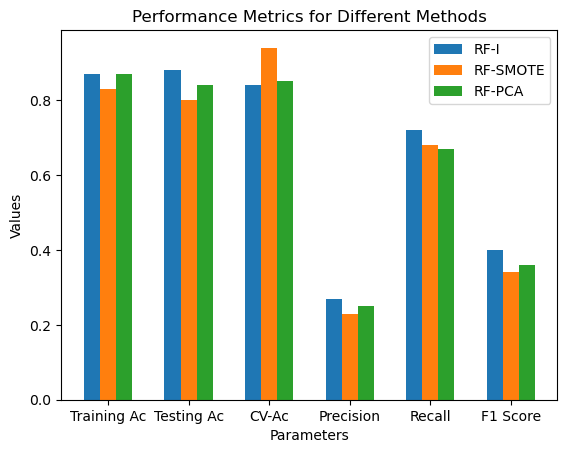

In [96]:
data = [
    ["Training Ac", 0.87, 0.83, 0.87],
    ["Testing Ac", 0.88, 0.80, 0.84],
    ["CV-Ac", 0.84, 0.94, 0.85],
    ["Precision", 0.27, 0.23, 0.25],
    ["Recall", 0.72, 0.68, 0.67],
    ["F1 Score", 0.40, 0.34, 0.36],
]
headers = ["Parameters", "RF-I", "RF-SMOTE", "RF-PCA"]
print(tabulate(data, headers=headers, tablefmt="grid"))
print("CV = Cross-Validation accuracy")

parameters = [row[0] for row in data]
values_RF_I = [row[1] for row in data]
values_RF_SMOTE = [row[2] for row in data]
values_RF_PCA = [row[3] for row in data]

bar_width = 0.2
index = np.arange(len(parameters))

plt.bar(index, values_RF_I, width=bar_width, label=headers[1])
plt.bar(index + bar_width, values_RF_SMOTE, width=bar_width, label=headers[2])
plt.bar(index + 2 * bar_width, values_RF_PCA, width=bar_width, label=headers[3])

plt.xlabel('Parameters')
plt.ylabel('Values')
plt.title('Performance Metrics for Different Methods')
plt.xticks(index + bar_width, parameters)
plt.legend()
plt.show()

+--------------+--------+-------+
| Parameters   |   RF-I |   ANN |
+==============+========+=======+
| Training Ac  |   0.87 |  0.95 |
+--------------+--------+-------+
| Testing Ac   |   0.88 |  0.96 |
+--------------+--------+-------+
| Precision    |   0.27 |  0.71 |
+--------------+--------+-------+
| Recall       |   0.72 |  0.44 |
+--------------+--------+-------+
| F1 Score     |   0.4  |  0.54 |
+--------------+--------+-------+


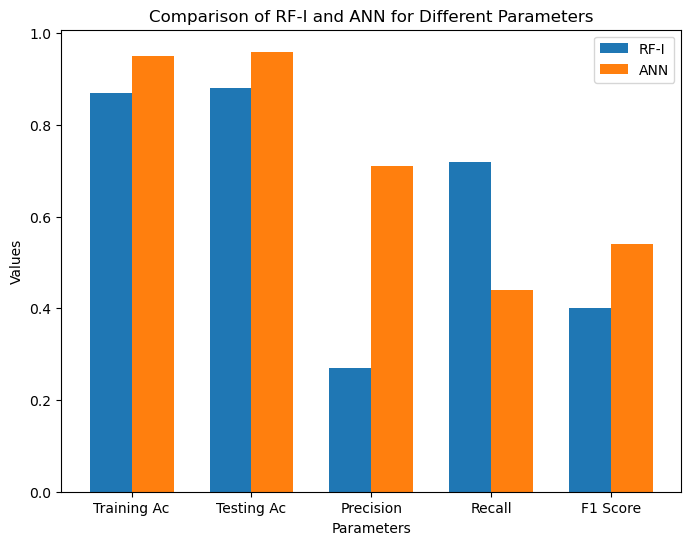

In [97]:
data = [
    ["Training Ac", 0.87, 0.95],
    ["Testing Ac", 0.88, 0.96],
    ["Precision", 0.27, 0.71],
    ["Recall", 0.72, 0.44],
    ["F1 Score", 0.40, 0.54],
]
headers = ["Parameters", "RF-I", "ANN"]
print(tabulate(data, headers=headers, tablefmt="grid"))

parameters = [row[0] for row in data]
rf_i_values = [row[1] for row in data]
ann_values = [row[2] for row in data]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(parameters))

bar1 = ax.bar(index, rf_i_values, bar_width, label='RF-I')
bar2 = ax.bar([i + bar_width for i in index], ann_values, bar_width, label='ANN')

ax.set_xlabel('Parameters')
ax.set_ylabel('Values')
ax.set_title('Comparison of RF-I and ANN for Different Parameters')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(parameters)
ax.legend()
plt.show()

## Assessment


The graph on the left compares the methods used in RF. The RF-I, which already contains class balance in its hyperparameter, was already able to improve performance compared to SMOTE and PCA methods. In addition, RF-PCA had no improvements, probably because it captured ~39% of data variance.
The recall metric was 2.4 times higher RF-I when compared with no hyperparameters adjustment, meaning that even with the adjustments in the imbalanced class, they were not enough to improve the negative class (target class) predictions, and precision remained low in all methods.
When we compare RF-I with ANN (right chart), we notice a significant increase in precision and, in contrast, a reduction in recall; however, the trade-off of these metrics (F1) is still better in the ANN than in RF-I. The precision improvement, 2.6 times higher than RF-I, shows that the model reduced the false positive predictions, which were predicted as positive when negative, indicating that the model performance is improving.


## Conclusion

Considering the feature importance results, the presence of any illness (‘CUR_ILL’) or pre-existing illness (‘HISTORY’) on the vaccination day may contribute to the death of a vaccinated patient. However, more hyperparameter adjustment, other methods to handle class imbalance and a better feature selection will be necessary to improve these models’ performance.
In general, all models provided a reasonable generalization from the training to the test set, accordingly with the cross-validation accuracy, with the ANN proving to be more suitable for this dataset because of the improved precision that reduced the false positive predictions. Overfitting and underfitting did not occur due to the robustness of these models.


### Reference

Müller, A. C. and Guido, S. (2017). Introduction to machine learning with Python: a guide for data scientists. 1st ed. United States of America. O’reilly Media.

Scikit-learn.org. (2012). 3.2. Tuning the hyper-parameters of an estimator — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/grid_search.html [Accessed 19 Nov. 2023].